In [1]:
import sys
sys.path.append("/Users/giovannilopresti/Documents/Data Analytics/Progetti Risto/Risto bilanciato/src/")

from utils import eda_display, risparmio_foodcost

In [2]:
# importo librerie necessarie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import display

# importo il file csv
path = '/Users/giovannilopresti/Documents/Data Analytics/Progetti Risto/Risto bilanciato/Data/restaurant_food_cost_data.csv'
ds = pd.read_csv(path)

# 
eda_display(ds)

DATASET HEAD:


,date,category,dish_name,quantity_sold,unit_cost,selling_price,total_cost,total_revenue,waste_qty,waste_cost,day_of_week
0,2024-04-01,Antipasti,Bruschetta Pomodoro,10,2.5,8,25.0,80,0.4,1.00,Lunedì
1,2024-04-01,Antipasti,Carpaccio di Manzo,15,5.2,16,78.0,240,0.9,4.68,Lunedì
2,2024-04-01,Antipasti,Caprese,14,3.8,12,53.2,168,0.8,3.04,Lunedì
3,2024-04-01,Antipasti,Prosciutto e Melone,13,4.5,14,58.5,182,1.0,4.50,Lunedì
4,2024-04-01,Primi,Spaghetti Carbonara,20,3.2,14,64.0,280,0.7,2.24,Lunedì
5,2024-04-01,Primi,Risotto Funghi,19,4.8,16,91.2,304,0.9,4.32,Lunedì
6,2024-04-01,Primi,Penne Arrabbiata,19,2.8,12,53.2,228,0.5,1.40,Lunedì
7,2024-04-01,Primi,Tagliatelle Bolognese,21,4.2,15,88.2,315,0.9,3.78,Lunedì
8,2024-04-01,Primi,Gnocchi 4 Formaggi,28,3.9,14,109.2,392,1.2,4.68,Lunedì
9,2024-04-01,Secondi,Tagliata di Manzo,24,8.5,28,204.0,672,2.4,20.40,Lunedì


----------------------------------------------------------------------
----------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3660 non-null   object 
 1   category       3660 non-null   object 
 2   dish_name      3660 non-null   object 
 3   quantity_sold  3660 non-null   int64  
 4   unit_cost      3660 non-null   float64
 5   selling_price  3660 non-null   int64  
 6   total_cost     3660 non-null   float64
 7   total_revenue  3660 non-null   int64  
 8   waste_qty      3660 non-null   float64
 9   waste_cost     3660 non-null   float64
 10  day_of_week    3660 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 314.7+ KB


None

----------------------------------------------------------------------
----------------------------------------------------------------------
DESCRIBE:


,quantity_sold,unit_cost,selling_price,total_cost,total_revenue,waste_qty,waste_cost
count,3660.000000,3660.00000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000
mean,20.460109,3.94000,13.250000,85.840383,296.005738,1.298852,6.000459
std,8.775528,1.77715,6.332334,57.404177,208.549083,0.712523,5.902801
min,7.000000,1.20000,5.000000,8.400000,35.000000,0.200000,0.360000
25%,14.000000,2.72500,8.000000,38.400000,112.000000,0.800000,2.240000
50%,19.000000,3.65000,13.000000,73.600000,252.000000,1.100000,3.780000
75%,25.000000,4.80000,16.000000,121.525000,444.000000,1.600000,7.650000
max,54.000000,8.50000,28.000000,348.500000,1148.000000,5.900000,42.480000


----------------------------------------------------------------------
----------------------------------------------------------------------
NAN VALUES:


date             0
category         0
dish_name        0
quantity_sold    0
unit_cost        0
selling_price    0
total_cost       0
total_revenue    0
waste_qty        0
waste_cost       0
day_of_week      0
dtype: int64

,Missing Count,Percentage


----------------------------------------------------------------------
----------------------------------------------------------------------
DUPLICATED:
0


In [3]:
# creo un df solo  con fc% target per ogni categoria, in modo da calcolare il risparmio potenziale

# definisco un dizionario con il fc% per categoria
target_fc = {
    'Antipasti': 20,
    'Primi': 22,
    'Secondi': 31,
    'Contorni': 17,
    'Dolci': 22
}

# estrapolo i nomi singoli delle categorie
categorie = ds['category'].unique()

# inizializzo una lista vuota
stats_piatti = []

# itero su ogni categoria per...
for cat in categorie:

    #  associare il fc% target per categoria
    fc = target_fc[cat]
    
    # ricavare tutte le info del dataset per cat
    cat_ds = ds[ds['category'] == cat]
    
    # estrapolare i piatti di ogni cat
    piatti_cat = cat_ds['dish_name'].unique()

    # applicare la funzione 'risparmio_food_cost' su ogni piatto
    stats_piatto = [risparmio_foodcost(ds, piatto, fc) for piatto in piatti_cat]

    # salvo i risultati in un df e li aggiungo alla lista
    stats_piatti.append(pd.DataFrame(stats_piatto))

# concateno tutti i df per averne uno solo, ignore_index per avere un indice continuo
stats_piatti = pd.concat(stats_piatti, ignore_index=True)
stats_piatti

,nome piatto,categoria,prezzo piatto,costo piatto,costo target,unità vendute,food cost % attuale,food cost % target,risparmio per unità,risparmio potenziale
0,Bruschetta Pomodoro,Antipasti,8.0,2.5,1.60,3206,36.25,20.0,0.90,2885.40
1,Carpaccio di Manzo,Antipasti,16.0,5.2,3.20,3267,38.12,20.0,2.00,6534.00
2,Caprese,Antipasti,12.0,3.8,2.40,3220,38.33,20.0,1.40,4508.00
3,Prosciutto e Melone,Antipasti,14.0,4.5,2.80,3253,39.29,20.0,1.70,5530.10
4,Spaghetti Carbonara,Primi,14.0,3.2,3.08,5547,27.86,22.0,0.12,665.64
5,Risotto Funghi,Primi,16.0,4.8,3.52,5590,35.62,22.0,1.28,7155.20
6,Penne Arrabbiata,Primi,12.0,2.8,2.64,5553,27.50,22.0,0.16,888.48
7,Tagliatelle Bolognese,Primi,15.0,4.2,3.30,5381,34.00,22.0,0.90,4842.90
8,Gnocchi 4 Formaggi,Primi,14.0,3.9,3.08,5520,36.43,22.0,0.82,4526.40
9,Tagliata di Manzo,Secondi,28.0,8.5,8.68,4230,38.93,31.0,-0.18,-761.40


In [4]:
# calcolo il risparmio potenziale per categoria
risparmio_cat = pd.DataFrame(stats_piatti.groupby('categoria')['risparmio potenziale'].sum())
risparmio_cat

,risparmio potenziale
categoria,
Antipasti,19457.50
Contorni,5339.70
Dolci,12231.16
Primi,18078.62
Secondi,-10648.18


In [5]:
# trovo i top 5 piatti per risparmio potennziale
top_5_risparmio = stats_piatti.groupby('nome piatto')['risparmio potenziale'].sum()
top_5_risparmio = pd.DataFrame(top_5_risparmio.sort_values(ascending=False).head(5))
top_5_r = top_5_risparmio['risparmio potenziale'].sum().round(2) # 28588.6

top_5_risparmio

,risparmio potenziale
nome piatto,
Risotto Funghi,7155.2
Carpaccio di Manzo,6534.0
Prosciutto e Melone,5530.1
Tagliatelle Bolognese,4842.9
Gnocchi 4 Formaggi,4526.4


### Osservazioni

I 5 piatti con maggior impatto (**€28.588,6**) rappresentano circa il 64% del totale risparmiabile:

1. **Risotto ai funghi** (€7.155,2)
   - primo piatto ad alto volume
   - porzione eccessiva o rincaro sulla fornutira di funghi 

<br>

2. **Carpaccio di manzo** (€6.534)
   - antipasto con margine più alto (€35.283,6)
   - ridurre la porzione di carne, 10/15 gr di carne impercettibili

<br>

3. **Prosciutto e Melone** (€5.530,1)
   - presente uno sbilanciamento tra il costo del piatto e il prezzo di vendita,
   - pensare a un crudo meno pregiato, o ad aumnetare il prezzo (sempre se i clienti saranno poi disposti a pagare tanto per un piatto    semplice)

<br>

4. **Tagliatelle Bolognese** (€4.843)
   - anche questo è tra gli hight seller
   - ridurre sensibilmente la quantità di ragù per porzione, magari compensando con salsa di pomodoro

<br>

5. **Gnocchi ai 4 formaggi** (€4.526,4)
   - la differenza tra il costo attuale rispetto al costo target è piccola
   - basta sostituire uno o due formaggi con equivalenti più economici, tagliare la base con più panna, aumentare il prezzo
   

In [7]:
# trovo la categoria più problematica per fc

# raggruppo prima per cat e trovo la media del fc
fc_cat_problematico = stats_piatti.groupby('categoria')['food cost % attuale'].mean().round(2)

# creo un df dal groupby ottenuto in modo da poterci lavorare su
fc_cat_problematico = pd.DataFrame(fc_cat_problematico)

# aggiungo la colonna con fc attuale per poi fare la differenza
fc_cat_problematico['food cost % target'] = [20, 22, 31, 17, 20]
fc_cat_problematico['variazione %'] = fc_cat_problematico['food cost % attuale'] - fc_cat_problematico['food cost % target']

fc_cat_problematico

,food cost % attuale,food cost % target,variazione %
categoria,,,
Antipasti,38.00,20,18.00
Contorni,45.65,22,23.65
Dolci,44.09,31,13.09
Primi,32.28,17,15.28
Secondi,36.11,20,16.11


In [8]:
# calcolo l'impatto di una riduzione del fc sul risparmio potenziale
revenue_mensile = {
    'Aprile': 161_283,
    'Maggio': 163_246,
    'Giugno': 197_455,
    'Luglio': 196_439,
    'Agosto': 201_454,
    'Settembre': 163_504
}

# Media mensile
media_revenue = sum(revenue_mensile.values()) / len(revenue_mensile)
print(f"Revenue medio mensile: €{media_revenue:,.0f}")

# Gap Food Cost %
fc_attuale = 29.0 
fc_target = 25.0   
gap = fc_attuale - fc_target 

# Risparmio mensile
risparmio = (gap / 100) * media_revenue
print(f"Risparmio mensile: €{risparmio:,.0f}")

Revenue medio mensile: €180,564
Risparmio mensile: €7,223


In [9]:
# trovo la categoria con la media spreco maggiore
media_cat_spreco = ds.groupby('category')['waste_qty'].mean().round(2)
media_cat_spreco = pd.DataFrame(media_cat_spreco.sort_values(ascending=False))
media_cat_spreco

,waste_qty
category,
Secondi,2.26
Primi,1.28
Antipasti,1.10
Contorni,1.06
Dolci,0.74


In [10]:
# stampo report finale

print("=" * 60)
print("EXECUTIVE SUMMARY")
print("=" * 60)
print(f"• Raggiungendo il foodcost % target si ottiene un risparmio totale di: {stats_piatti['risparmio potenziale'].sum():.0f}€")
print("=" * 60)
print(f"• Le categorie più problematiche per variazione % tra fc attuale e fc target:\n\n{fc_cat_problematico['variazione %'].sort_values(ascending=False).head(3)}")
print("=" * 60)
print(f"Top 3 azioni prioritarie:\n 1. indagare le voci prezzo di questi piatti:\n\n {top_5_risparmio}\n\n 2. priorità massima ai Primi per rapporto fc% alto e alti volumi di vendita,\n\n 3. gestire le scorte dei Secondi per ridurre gli sprechi")

EXECUTIVE SUMMARY
• Raggiungendo il foodcost % target si ottiene un risparmio totale di: 44459€
• Le categorie più problematiche per variazione % tra fc attuale e fc target:

categoria
Contorni     23.65
Antipasti    18.00
Secondi      16.11
Name: variazione %, dtype: float64
Top 3 azioni prioritarie:
 1. indagare le voci prezzo di questi piatti:

                        risparmio potenziale
nome piatto                                
Risotto Funghi                       7155.2
Carpaccio di Manzo                   6534.0
Prosciutto e Melone                  5530.1
Tagliatelle Bolognese                4842.9
Gnocchi 4 Formaggi                   4526.4

 2. priorità massima ai Primi per rapporto fc% alto e alti volumi di vendita,

 3. gestire le scorte dei Secondi per ridurre gli sprechi


Andamento FC% mensile:



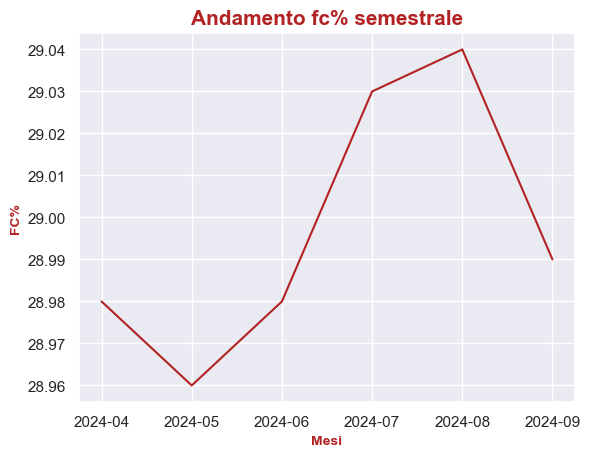

In [11]:
# valuto le variazioni mensile di ricavi, ccosti e il relativo fc%

# trasformo la seire data in formato Datetime
ds['date'] = pd.to_datetime(ds['date'])

# raggruppo usando come dimensione il mese di ogni data e come misura la somma aggrregata di costi e ricavi
mensile = ds.groupby(ds['date'].dt.to_period('M'))[['total_cost', 'total_revenue']].sum()

# calcolo il relativo fc%, trasformo in dataframe e stampo i df
mensile['food_cost%'] = (mensile['total_cost']/mensile['total_revenue']*100).round(2)
mensile = pd.DataFrame(mensile)
print('Andamento FC% mensile:\n')
mensile
print('='*70)
print('='*70)

# creo un grafico a linea
# uso il tema di seaborn e stampo titolo e etichette delgi assi
sns.set_theme()
plt.plot(mensile.index.astype(str), mensile['food_cost%'], color='#b22222')
plt.title('Andamento fc% semestrale', size=15, fontweight='bold', color='#b22222')
plt.xlabel('Mesi', size=10, fontweight='bold', color='#b22222')
plt.ylabel('FC%', size=10, fontweight='bold', color='#b22222')
plt.show()

### **Osservazioni**

**Stabilità operativa:**
- Food cost % rimane costante tra 28.96% e 29.04% per tutto il periodo
- Variazione mensile < 0.1% indica controllo gestionale efficace
- Nessuna stagionalità evidente nei costi

**Insight chstabile)
- Il problema è **strutturale**: ricette e porzioni sono sistematicamente sopra il target
- Conferma che interventi su ricette/fornitori daranno risultati prevedibili e sostenibili

**Prossimi step:**
- Implementare correzioni sulle categorie critiche (Antipasti, Dolci, Contorni)
- Monitorare l'impatto delle modifiche mese per mese
- Target: portare FC% comples5ivo da 29% a 2. Si calcola un risparmio mensile di €7,223 (-€3,500/mese)


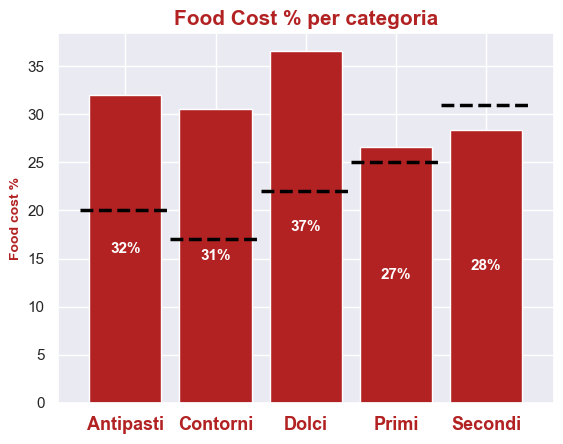

In [13]:
# creo un barplot con fc% attuale e soglia ottimale per categoria
fc_pct_categorie = ds.groupby('category')[['total_cost', 'total_revenue']].sum()
fc_pct_categorie['fc%'] = ((fc_pct_categorie['total_cost']/fc_pct_categorie['total_revenue'])*100).round(2)
fc_pct_categorie

# setto parametri ed elementi grafici
sns.set_theme()
bars = plt.bar(x=fc_pct_categorie.index, height=fc_pct_categorie['fc%'], color='#b22222')
plt.title('Food Cost % per categoria', size=15, fontweight='bold', color='#b22222')
plt.xticks(size=13, fontweight='bold', color='#b22222')
plt.ylabel('Food cost %', size=10, fontweight='bold', color='#b22222')
plt.bar_label(bars,
              fmt='%.0f%%',
              label_type='center',
              fontsize=11,
              fontweight='bold',
              color='white')

# riprendo il fc target per categoria per creare le soglie in ogni barra
target_cat = {'Antipasti':20,
              'Primi': 25,
              'Secondi': 31,
              'Contorni': 17,
              'Dolci': 22}

# creo coppie indice, categoria con enumerate così da visualizzare le linee soglia con fc personalizzato per categoria
for i, categoria in enumerate(fc_pct_categorie.index):
    
  target = target_cat[categoria]

  # setto i parametri delle linee
  plt.hlines(y=target,
             color='black',
             xmin=i-0.5,
             xmax=i+0.5,
             linestyle='--',
             linewidth=2.5)
plt.show()

### **Osservazioni**
**Performance per categoria:**
-  **Secondi**: Food cost sotto controlloe allineato al target del 31. C'è addirittura margine per un leggero aumento (porzione più grande, ingrediente più costoso)
- ️ **Primi**: Leggermentsopra il target (25% vs 27%), margine di ottimizzazione: €18,000/anno
- **Antipasti, Contorni e Dolci**: Significativamente sopra soglialia

**Priorità di intervento:**
1. **Antipasti** (32% vs 20%): maggior gap assoluto - risparmi potenziali €19,457
2. **Dolci** (28% vs 22%): buon volume, rapida implementazione - risparmi €12,231  
3. **Contorni** (24% vs 17%): minor impatto ma facili da correggere - risparmi €5,340

**Azioni suggerite:**
- Revisione porzioni e/o ricette per le categorie critiche
- Negoziazione fornitori per ingredienti ad alto costo
- Analisi dettagliata dei top piatti contributori er categoria


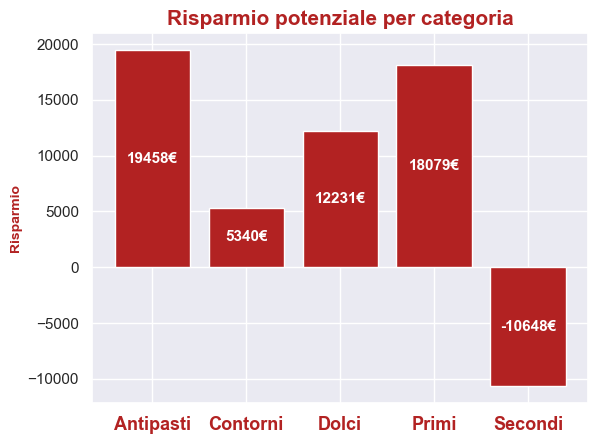

In [15]:
# creo un grafico a barre con il risp potenziale per categoria
categorie = stats_piatti.groupby('categoria')['risparmio potenziale'].sum()

sns.set_theme()
bars = plt.bar(x=categorie.index, height=categorie, color='#b22222')
plt.title('Risparmio potenziale per categoria', size=15, fontweight='bold', color='#b22222')
plt.xticks(size=13, fontweight='bold', color='#b22222')
plt.ylabel('Risparmio', size=10, fontweight='bold', color='#b22222')
plt.bar_label(bars,
              fmt='%.0f€', 
              label_type='center',
              fontsize=11,
              fontweight='bold',
              color='white')
plt.show()

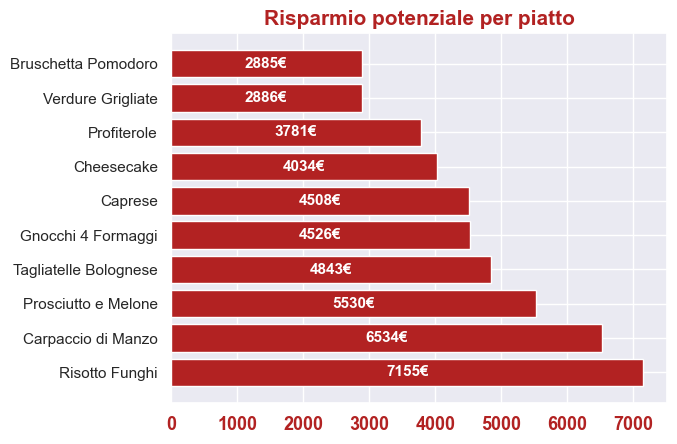

In [16]:
# ottengo la lista de primi 10 piatti per maggior risparmio
top_10 = stats_piatti.groupby('nome piatto')['risparmio potenziale'].sum()
top_10 = top_10.sort_values(ascending=False).head(10)

# creo un grafico a abrre orizzontale
sns.set_theme()
bars = plt.barh(y=top_10.index, width=top_10, color='#b22222')
plt.title('Risparmio potenziale per piatto', size=15, fontweight='bold', color='#b22222')
plt.xticks(size=13, fontweight='bold', color='#b22222')
plt.bar_label(bars,
              fmt='%.0f€', #'32%'  ← %.0f diventa 32, e %% diventa %
              label_type='center',
              fontsize=11,
              fontweight='bold',
              color='white')
plt.show()

## Osservazioni

Il food cost reale dei secondi è l'unico in ordine, ma il risparmio potenziale dalle altre categorie è elevato, soprattutto per primi e per secondi.<br>
I primi hanno un risparmio così elevato anche se il food cost target si discosta di poco da quello reale per via degli alti volumi di vendita, considerazione confermata dal fatto che tra i primi 5 piatti ci sono 3 primi, seguono gli antipasti.

Rank piatti per margine netto:


,total_cost,total_revenue,fc%,margin
dish_name,,,,
Tagliata di Manzo,35955.0,118440,30.36,82485.0
Filetto di Branzino,31392.0,113360,27.69,81968.0
Costata di Maiale,26622.8,94468,28.18,67845.2
Risotto Funghi,26832.0,89440,30.00,62608.0
Spaghetti Carbonara,17750.4,77658,22.86,59907.6
Pollo alla Griglia,21384.0,80190,26.67,58806.0
Tagliatelle Bolognese,22600.2,80715,28.00,58114.8
Gnocchi 4 Formaggi,21528.0,77280,27.86,55752.0
Penne Arrabbiata,15548.4,66636,23.33,51087.6


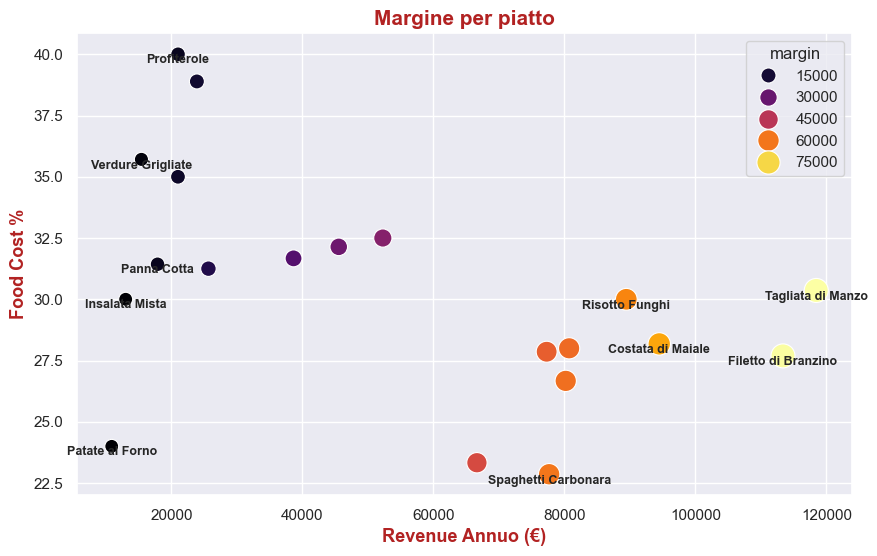

In [54]:
print('=' * 60)
print('Rank piatti per margine netto:')

# creo un ogetto groupby per mostare per ogni piatto: fc% e margine netto
fc_pct_piatti = ds.groupby('dish_name')[['total_cost', 'total_revenue']].sum()
fc_pct_piatti['fc%'] = ((fc_pct_piatti['total_cost']/fc_pct_piatti['total_revenue'])*100).round(2)
fc_pct_piatti['margin'] = (fc_pct_piatti['total_revenue'] - fc_pct_piatti['total_cost'])

# creo un rank decrescente per margine
display(fc_pct_piatti.sort_values(by='margin', ascending=False))

# visualizzo i risulatti con un scatterplot
plt.figure(figsize=(10, 6))
sns.set_theme()
sns.scatterplot(x=fc_pct_piatti['total_revenue'],
                y=fc_pct_piatti['fc%'],
                hue=fc_pct_piatti['margin'],
                size=fc_pct_piatti['margin'],
                sizes=(100, 300),
                palette=("inferno"))

#Etichetta solo top/bottom 5
top5 = fc_pct_piatti.nlargest(5, 'margin').index
bottom5 = fc_pct_piatti.nsmallest(5, 'margin').index
labels = list(top5) + list(bottom5)

# itero su tuti i piatti(nome e dati)
for piatto, row in fc_pct_piatti.iterrows():
    if piatto in labels:
        # se il nome piatto in labels creo l'etichetta
        plt.text(row['total_revenue'], row['fc%'], # coordinate nel grafico
                 piatto, # nome
                 fontsize=9, ha='center', va='top', fontweight='bold') # stile e posizionamento dell'etichetta

plt.xlabel('Revenue Annuo (€)', fontsize=13, fontweight='bold', color='#b22222')
plt.ylabel('Food Cost %', fontsize=13, fontweight='bold', color='#b22222')
plt.title('Margine per piatto', fontsize=15, fontweight='bold', color='#b22222')
plt.show()

### Osservazioni


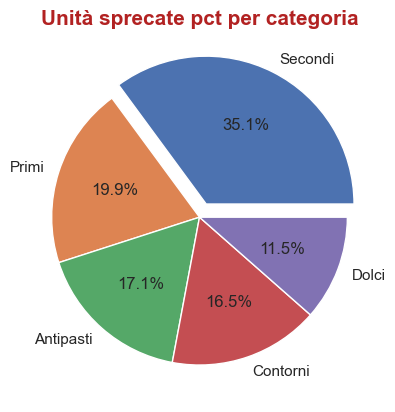

In [20]:
sns.set_theme()
explode = [0.1, 0, 0, 0, 0]
plt.pie(media_cat_spreco['waste_qty'], labels=media_cat_spreco.index, explode=explode, autopct='%1.1f%%')
plt.title("Unità sprecate pct per categoria", fontsize=15, fontweight='bold', color='#b22222')
plt.show()

In [21]:
ds['waste_cost'] = ds['waste_qty'] * ds['unit_cost']
costo_sprechi = ds['waste_cost'].sum()
risparmio_extra_15 = costo_sprechi * 0.15
risparmio_extra_20 = costo_sprechi * 0.20

print(f"Costo totale da unità sprecate: €{costo_sprechi:.1f}")
print(f"Risparmio extra del 15% dopo correttivi: €{risparmio_extra_15:.1f}")
print(f"Risparmio extra del 20% dopo correttivi: €{risparmio_extra_20:.1f}")

Costo totale da unità sprecate: €21961.7
Risparmio extra del 15% dopo correttivi: €3294.3
Risparmio extra del 20% dopo correttivi: €4392.3


### **Osservazioni**

**Analisi sprechi:**


- **Antipasti: 17.1%** 
- **Primi: 19.9%**
- **Dolci: 11.5%**  
- **Secondi: 35.1%**
- **Contorni: 16.5%**

**Correlazione FC% vs Sprechi:**
- Antipasti hanno:
  - Food cost alto (32% vs 20% target)
  - Discreto spreco in unità
  - → Doppio problema: costi alti + inefficienza operativa

**Root causes possibili:**
- **Secondi**: shelf life limitata, mise en place molto carica 
- **Antipasti**: preparazioni anticipate (bresaola, carpacci) che deteriorano
- **Primi**: porzioni eccessive che ritornano in cucina

**Azioni correttive:**
- Implementare sistema FIFO rigoroso per ingredienti deperibili
- Ridurre mise en place per antipasti a rischio (produrre on-demand)
- Training staff su porzioni standard
- Potenziale risparmio addizionale: 15-20% dei costi spreco (€21.961,7/anno)

**Metriche da monitorare:**
- Waste % per categoria (target: -20% in 3 mesi)
- Correlazione con food cost dopo ottimizzazione ricette


In [23]:
print('='*60)
print('='*60)
print('='*60)

## CONCLUSIONI E NEXT STEPS

### **Risultati dell'analisi:**

**Risparmio totale potenziale identificato: €44,458/anno**
- Antipasti: €19,457 (44%)
- Primi: €18,078 (41%)
- Dolci: €12,231 (27%)
- Contorni: €5,339 (12%)
- Secondi: -€10648 <br>
      -> i secondi hanno buone performance, per questa categoria non conviene abbassare il fc% perchè quello attuale è in linea. <br>

### **Piano di implementazione (90 giorni):**

**Mese 1 - Quick Wins:**
- Focus sui Top 5 piatti (€28k di impatto)
- Test ricette modificate con staff
- Negoziazione fornitori ingredienti critici
- Riduzione waste tramite FIFO e mise en place ottimizzata
- Target: -1.5% food cost complessivo

**Mese 2 - Rollout Completo:**
- Implementazione modifiche su tutte le categorie critiche
- Training cucina su nuove ricette/porzioni
- Target: -2% food cost complessivo

**Mese 3 - Ottimizzazione Sprechi:**
- Fine-tuning ricette in base a feedback
- Consolidamento nuovi standard operativi
- Target: FC% complessivo a 27%

### **ROI previsto:**
- Investimento iniziale: €2,000 (tempo analisi + formazione staff)
- Payback period: **2 settimane**
- Risparmio anno 1: €40,000+ (assumendo 90% implementazione)
- **ROI: 2,000%**

### **Metriche di successo:**
- Food cost % complessivo: 29% → 27%
- Waste % per categoria: -30%
- Margine operativo: +3 punti percentuali
- Monitoraggio: dashboard settimanale su KPI

---

**Progetto completato il:** 08/11/2025 <br>
**Prossima review:** 08/12/2025
